# Can it possible to simplify query into tuple of (action, object?)

In [3]:
cd ../../

/mnt/sda/otani/Experiments/moment_retrieval


In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

In [4]:
df = pd.read_csv('data/processed/train.csv')

In [5]:
df.head()

,id,start (sec),end (sec),description,length
0,AO8RW,0.0,6.9,a person is putting a book on a shelf.,33.67
1,Y6R7T,20.8,30.0,person begins to play on a phone.,29.42
2,Y6R7T,20.8,30.0,person start playing on their phone.,29.42
3,Y6R7T,7.3,17.3,person pouring it into a glass.,29.42
4,Y6R7T,7.3,17.3,the person pours some water into the glass.,29.42


In [24]:
simplified_query = []

for i, d in enumerate(df['description']):
    tokens = nlp(d)
    
    verb_word = []
    obj_word = []
    for token in tokens:
        if token.is_stop:
            continue
            
        if token.text == 'person':
            continue
            
        if token.tag_[:2] == 'VB':
            verb_word.append(token.lemma_)

        if token.tag_ in ['NN', 'NNS']:
            obj_word.append(token.lemma_)

    query_tuple = (verb_word, obj_word)
    simplified_query.append(query_tuple)

In [54]:
for item in simplified_query:
    q = ""
    for w in sum(item, []):
        q+=f"{w} -- "
    print(q)

put -- book -- shelf -- 
begin -- play -- phone -- 
start -- play -- phone -- 
pour -- glass -- 
pour -- water -- glass -- 
pour -- water -- glass -- 
start -- watch -- television -- 
take -- cup -- fridge -- 
sneeze -- mirror -- 
awaken -- 
hold -- mirror -- 
play -- camera -- 
sit -- sneeze -- computer -- 
start -- sneeze -- 
notebook -- bag -- 
start -- sneeze -- 
open -- door -- 
shoe -- 
put -- shoe -- 
phone -- 
shoe -- 
tidy -- smile -- wardrobe -- entryway -- 
cook -- stove -- 
cook -- stove -- 
put -- coffee -- table -- 
run -- room -- 
run -- man -- 
run -- shoe -- 
open -- closet -- door -- 
see -- watch -- television -- 
watch -- television -- sofa -- 
sit -- watch -- couch -- television -- 
see -- open -- door -- closet -- 
awaken -- bed -- 
open -- laptop -- 
open -- laptop -- 
open -- laptop -- 
drink -- glass -- water -- 
open -- book -- 
table -- 
pour -- water -- glass -- 
sit -- eat -- sofa -- dish -- 
open -- door -- 
put -- shoe -- 
put -- shoe -- 
open -- door -- 

Text(0.5, 1.0, 'Top-50 vocabulary (/193)')

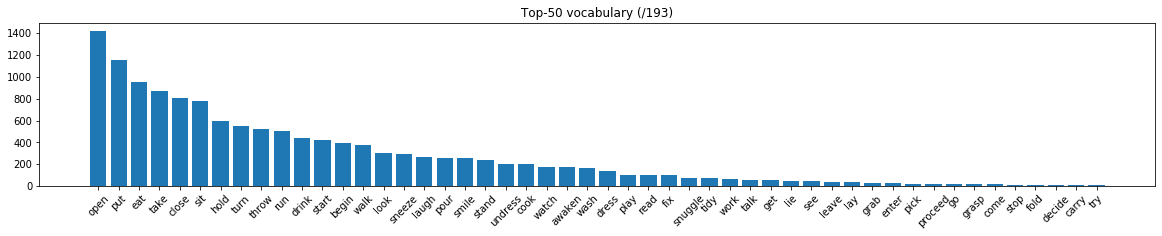

In [47]:
from collections import Counter

verbs = sum([x[0] for x in simplified_query], [])
verb_c = Counter(verbs)

counts = [v for _, v in verb_c.most_common(50)]
vocab = [k for k, _ in verb_c.most_common(50)]
plt.figure(figsize=(20, 3))
plt.bar(range(len(counts)), counts)
_ = plt.xticks(range(len(counts)), vocab, rotation=45)
plt.title(f"Top-50 verb vocabulary (/{len(verb_c)})")

Text(0.5, 1.0, 'Top-50 noun vocabulary (/444)')

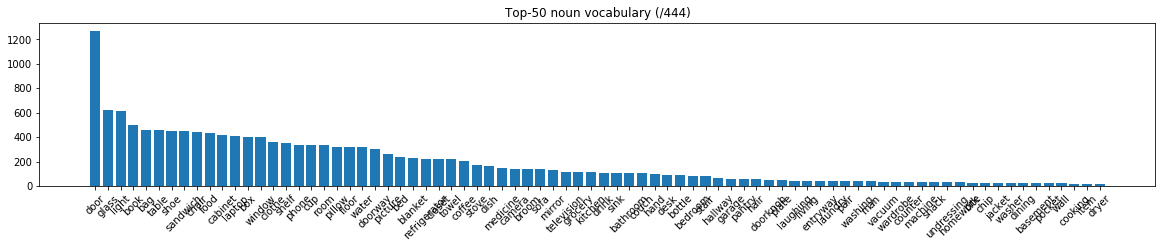

In [52]:
nouns = sum([x[1] for x in simplified_query], [])
noun_c = Counter(nouns)

counts = [v for _, v in noun_c.most_common(80)]
vocab = [k for k, _ in noun_c.most_common(80)]
plt.figure(figsize=(20, 3))
plt.bar(range(len(counts)), counts)
_ = plt.xticks(range(len(counts)), vocab, rotation=45)
plt.title(f"Top-50 noun vocabulary (/{len(noun_c)})")

In [50]:
print(f"#train sample: {len(df)}")
print(f"#vocab (verb): {len(verb_c)}")
print(f"#vocab (noun)): {len(noun_c)}")

#train sample: 12408
#vocab (verb): 193
#vocab (noun)): 444
